# Import Modules

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from src.svm import *
from src.trainer import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Pre-defined functions

This section contains functions that will be used in the notebook

In [2]:
# use this to visualize the weights of the model 
def vis_weights(weight_history,num_samples=1, shape=(28,28)):
    x=np.linspace(0, len(weight_history)-1, num=num_samples, dtype=np.int64)
    plt.subplots_adjust(wspace=0, hspace=5)
    D, C=model.w.shape
    fig=plt.figure(dpi=600)
    samples=[weight_history[xi] for xi in x]
    n=1
    
    rows=len(samples)
    for i, weights in enumerate(samples):
        for j, row in enumerate(weights.T):
            ax = fig.add_subplot(rows, C, n)
            if n <= C:
                ax.set_title(str(j))
            ax.axis('off')
            plt.imshow(row[:-1].reshape(shape))
            n+=1
        

# Load the Dataset

In [17]:
ds, train_dl, test_dl=get_dataloaders()

print(f'training set size: {len(ds["train"]["image"])}')
print(f'testing set size: {len(ds["test"]["image"])}')
print(f'number of training batches: {len(train_dl)}')
print(f'number of testing batches: {len(test_dl)}')


Found cached dataset mnist (/data/john/projects/svm/./datasets/mnist/mnist/1.0.0/fda16c03c4ecfb13f165ba7e29cf38129ce035011519968cdaf74894ce91c9d4)


  0%|          | 0/2 [00:00<?, ?it/s]

training set size: 60000
testing set size: 10000
number of training batches: 3750
number of testing batches: 625


# Load Pre-Trained Weights

Use this to load the pre-trained weights saved in `<project root>/checkpoints/weights.npy`. This model achieves $\sim90\%$ on the Training and Test sets

Otherwise you can see below for training from scratch.

In [ ]:
# load checkpoint and visualize weights
model=SVM()
model.load_checkpoint()
plt.rcParams['figure.figsize'] = [20, 20]
vis_weights([model.w])

loading checkpoint
done


<Figure size 2000x2000 with 0 Axes>

# Train a model from scratch and visualize the weights

We train our model on the loss function
$$
\mathcal{L(\theta)}=\lambda R_2(\theta)+\frac{1}{N}\sum\limits_{i=1}^N \max(0, 1-y_if_\theta(x))
$$
The notes say to use the regularizer $\lambda$ to scale the hinge loss but it makes more sense to use it to scale the regularization term.

Found cached dataset mnist (/data/john/projects/svm/./datasets/mnist/mnist/1.0.0/fda16c03c4ecfb13f165ba7e29cf38129ce035011519968cdaf74894ce91c9d4)


  0%|          | 0/2 [00:00<?, ?it/s]


  0%|                                                     | 1/600 [00:00<06:37,  1.51it/s]
  0%| | 1/600 [00:02<06:37,  1.51it/s, loss_trn=1.24e+3, loss_tst=731, acc_trn=0.0813, acc
  0%| | 2/600 [00:03<16:52,  1.69s/it, loss_trn=1.24e+3, loss_tst=731, acc_trn=0.0813, acc
  0%| | 2/600 [00:04<16:52,  1.69s/it, loss_trn=723, loss_tst=476, acc_trn=0.0813, acc_tst
  0%| | 3/600 [00:05<20:00,  2.01s/it, loss_trn=723, loss_tst=476, acc_trn=0.0813, acc_tst
  0%| | 3/600 [00:07<20:00,  2.01s/it, loss_trn=461, loss_tst=370, acc_trn=0.0881, acc_tst
  1%| | 4/600 [00:07<21:37,  2.18s/it, loss_trn=461, loss_tst=370, acc_trn=0.0881, acc_tst
  1%| | 4/600 [00:09<21:37,  2.18s/it, loss_trn=369, loss_tst=328, acc_trn=0.0984, acc_tst
  1%| | 5/600 [00:10<22:19,  2.25s/it, loss_trn=369, loss_tst=328, acc_trn=0.0984, acc_tst
  1%| | 5/600 [00:11<22:19,  2.25s/it, loss_trn=328, loss_tst=302, acc_trn=0.108, acc_tst=
  1%| | 6/600 [00:12<22:45,  2.30s/it, loss_trn=328, loss_tst=302, acc_trn=0.108, acc_tst

  7%| | 44/600 [01:43<22:20,  2.41s/it, loss_trn=62, loss_tst=58.4, acc_trn=0.505, acc_tst
  7%| | 44/600 [01:45<22:20,  2.41s/it, loss_trn=57, loss_tst=56.6, acc_trn=0.513, acc_tst
  8%| | 45/600 [01:46<21:37,  2.34s/it, loss_trn=57, loss_tst=56.6, acc_trn=0.513, acc_tst
  8%| | 45/600 [01:47<21:37,  2.34s/it, loss_trn=55.1, loss_tst=55, acc_trn=0.51, acc_tst=
  8%| | 46/600 [01:48<21:48,  2.36s/it, loss_trn=55.1, loss_tst=55, acc_trn=0.51, acc_tst=
  8%| | 46/600 [01:50<21:48,  2.36s/it, loss_trn=55.6, loss_tst=53.3, acc_trn=0.538, acc_t
  8%| | 47/600 [01:50<21:52,  2.37s/it, loss_trn=55.6, loss_tst=53.3, acc_trn=0.538, acc_t
  8%| | 47/600 [01:52<21:52,  2.37s/it, loss_trn=56.2, loss_tst=51.7, acc_trn=0.53, acc_ts
  8%| | 48/600 [01:53<21:54,  2.38s/it, loss_trn=56.2, loss_tst=51.7, acc_trn=0.53, acc_ts
  8%| | 48/600 [01:54<21:54,  2.38s/it, loss_trn=52, loss_tst=50.2, acc_trn=0.557, acc_tst
  8%| | 49/600 [01:55<21:54,  2.39s/it, loss_trn=52, loss_tst=50.2, acc_trn=0.557, acc_tst

 14%|▏| 87/600 [03:28<20:31,  2.40s/it, loss_trn=21.8, loss_tst=20.3, acc_trn=0.707, acc_t
 15%|▏| 88/600 [03:28<20:33,  2.41s/it, loss_trn=21.8, loss_tst=20.3, acc_trn=0.707, acc_t
 15%|▏| 88/600 [03:30<20:33,  2.41s/it, loss_trn=21.5, loss_tst=19.9, acc_trn=0.698, acc_t
 15%|▏| 89/600 [03:31<20:29,  2.41s/it, loss_trn=21.5, loss_tst=19.9, acc_trn=0.698, acc_t
 15%|▏| 89/600 [03:33<20:29,  2.41s/it, loss_trn=19.5, loss_tst=19.6, acc_trn=0.731, acc_t
 15%|▏| 90/600 [03:33<19:51,  2.34s/it, loss_trn=19.5, loss_tst=19.6, acc_trn=0.731, acc_t
 15%|▏| 90/600 [03:35<19:51,  2.34s/it, loss_trn=18.3, loss_tst=19.2, acc_trn=0.75, acc_ts
 15%|▏| 91/600 [03:35<19:59,  2.36s/it, loss_trn=18.3, loss_tst=19.2, acc_trn=0.75, acc_ts
 15%|▏| 91/600 [03:37<19:59,  2.36s/it, loss_trn=19.4, loss_tst=18.8, acc_trn=0.726, acc_t
 15%|▏| 92/600 [03:38<20:04,  2.37s/it, loss_trn=19.4, loss_tst=18.8, acc_trn=0.726, acc_t
 15%|▏| 92/600 [03:40<20:04,  2.37s/it, loss_trn=20, loss_tst=18.5, acc_trn=0.708, acc_tst

 22%|▏| 131/600 [05:11<18:50,  2.41s/it, loss_trn=11, loss_tst=10.1, acc_trn=0.769, acc_ts
 22%|▏| 131/600 [05:13<18:50,  2.41s/it, loss_trn=11, loss_tst=9.95, acc_trn=0.763, acc_ts
 22%|▏| 132/600 [05:14<18:46,  2.41s/it, loss_trn=11, loss_tst=9.95, acc_trn=0.763, acc_ts
 22%|▏| 132/600 [05:16<18:46,  2.41s/it, loss_trn=10.6, loss_tst=9.82, acc_trn=0.773, acc_
 22%|▏| 133/600 [05:16<18:46,  2.41s/it, loss_trn=10.6, loss_tst=9.82, acc_trn=0.773, acc_
 22%|▏| 133/600 [05:18<18:46,  2.41s/it, loss_trn=10.6, loss_tst=9.68, acc_trn=0.764, acc_
 22%|▏| 134/600 [05:19<18:45,  2.41s/it, loss_trn=10.6, loss_tst=9.68, acc_trn=0.764, acc_
 22%|▏| 134/600 [05:20<18:45,  2.41s/it, loss_trn=9.54, loss_tst=9.57, acc_trn=0.802, acc_
 22%|▏| 135/600 [05:21<18:07,  2.34s/it, loss_trn=9.54, loss_tst=9.57, acc_trn=0.802, acc_
 22%|▏| 135/600 [05:23<18:07,  2.34s/it, loss_trn=8.89, loss_tst=9.43, acc_trn=0.817, acc_
 23%|▏| 136/600 [05:23<18:15,  2.36s/it, loss_trn=8.89, loss_tst=9.43, acc_trn=0.817, acc_

 29%|▎| 174/600 [06:56<17:01,  2.40s/it, loss_trn=6.09, loss_tst=5.92, acc_trn=0.814, acc_
 29%|▎| 175/600 [06:57<17:15,  2.44s/it, loss_trn=6.09, loss_tst=5.92, acc_trn=0.814, acc_
 29%|▎| 175/600 [06:58<17:15,  2.44s/it, loss_trn=6.38, loss_tst=5.84, acc_trn=0.798, acc_
 29%|▎| 176/600 [06:59<17:06,  2.42s/it, loss_trn=6.38, loss_tst=5.84, acc_trn=0.798, acc_
 29%|▎| 176/600 [07:01<17:06,  2.42s/it, loss_trn=6.34, loss_tst=5.79, acc_trn=0.796, acc_
 30%|▎| 177/600 [07:02<17:02,  2.42s/it, loss_trn=6.34, loss_tst=5.79, acc_trn=0.796, acc_
 30%|▎| 177/600 [07:03<17:02,  2.42s/it, loss_trn=6.2, loss_tst=5.73, acc_trn=0.807, acc_t
 30%|▎| 178/600 [07:04<16:56,  2.41s/it, loss_trn=6.2, loss_tst=5.73, acc_trn=0.807, acc_t
 30%|▎| 178/600 [07:06<16:56,  2.41s/it, loss_trn=6.23, loss_tst=5.67, acc_trn=0.797, acc_
 30%|▎| 179/600 [07:06<16:51,  2.40s/it, loss_trn=6.23, loss_tst=5.67, acc_trn=0.797, acc_
 30%|▎| 179/600 [07:08<16:51,  2.40s/it, loss_trn=5.62, loss_tst=5.62, acc_trn=0.833, acc_

 36%|▎| 218/600 [08:40<15:23,  2.42s/it, loss_trn=4.12, loss_tst=3.95, acc_trn=0.831, acc_
 36%|▎| 218/600 [08:41<15:23,  2.42s/it, loss_trn=4.45, loss_tst=3.92, acc_trn=0.804, acc_
 36%|▎| 219/600 [08:42<15:20,  2.42s/it, loss_trn=4.45, loss_tst=3.92, acc_trn=0.804, acc_
 36%|▎| 219/600 [08:44<15:20,  2.42s/it, loss_trn=3.99, loss_tst=3.9, acc_trn=0.832, acc_t
 37%|▎| 220/600 [08:44<15:18,  2.42s/it, loss_trn=3.99, loss_tst=3.9, acc_trn=0.832, acc_t
 37%|▎| 220/600 [08:46<15:18,  2.42s/it, loss_trn=4.22, loss_tst=3.86, acc_trn=0.817, acc_
 37%|▎| 221/600 [08:47<15:19,  2.43s/it, loss_trn=4.22, loss_tst=3.86, acc_trn=0.817, acc_
 37%|▎| 221/600 [08:49<15:19,  2.43s/it, loss_trn=4.17, loss_tst=3.83, acc_trn=0.815, acc_
 37%|▎| 222/600 [08:49<15:14,  2.42s/it, loss_trn=4.17, loss_tst=3.83, acc_trn=0.815, acc_
 37%|▎| 222/600 [08:51<15:14,  2.42s/it, loss_trn=4.1, loss_tst=3.79, acc_trn=0.822, acc_t
 37%|▎| 223/600 [08:52<15:09,  2.41s/it, loss_trn=4.1, loss_tst=3.79, acc_trn=0.822, acc_t

 44%|▍| 261/600 [10:25<13:33,  2.40s/it, loss_trn=3.04, loss_tst=2.87, acc_trn=0.832, acc_
 44%|▍| 262/600 [10:25<13:34,  2.41s/it, loss_trn=3.04, loss_tst=2.87, acc_trn=0.832, acc_
 44%|▍| 262/600 [10:27<13:34,  2.41s/it, loss_trn=2.95, loss_tst=2.85, acc_trn=0.848, acc_
 44%|▍| 263/600 [10:28<13:33,  2.41s/it, loss_trn=2.95, loss_tst=2.85, acc_trn=0.848, acc_
 44%|▍| 263/600 [10:29<13:33,  2.41s/it, loss_trn=3.18, loss_tst=2.83, acc_trn=0.817, acc_
 44%|▍| 264/600 [10:30<13:29,  2.41s/it, loss_trn=3.18, loss_tst=2.83, acc_trn=0.817, acc_
 44%|▍| 264/600 [10:32<13:29,  2.41s/it, loss_trn=2.87, loss_tst=2.82, acc_trn=0.844, acc_
 44%|▍| 265/600 [10:33<13:26,  2.41s/it, loss_trn=2.87, loss_tst=2.82, acc_trn=0.844, acc_
 44%|▍| 265/600 [10:34<13:26,  2.41s/it, loss_trn=3.05, loss_tst=2.8, acc_trn=0.83, acc_ts
 44%|▍| 266/600 [10:35<13:23,  2.41s/it, loss_trn=3.05, loss_tst=2.8, acc_trn=0.83, acc_ts
 44%|▍| 266/600 [10:37<13:23,  2.41s/it, loss_trn=3.01, loss_tst=2.8, acc_trn=0.831, acc_t

 51%|▌| 305/600 [12:08<11:44,  2.39s/it, loss_trn=2.53, loss_tst=2.25, acc_trn=0.816, acc_
 51%|▌| 305/600 [12:10<11:44,  2.39s/it, loss_trn=2.27, loss_tst=2.28, acc_trn=0.86, acc_t
 51%|▌| 306/600 [12:11<11:43,  2.39s/it, loss_trn=2.27, loss_tst=2.28, acc_trn=0.86, acc_t
 51%|▌| 306/600 [12:12<11:43,  2.39s/it, loss_trn=2.39, loss_tst=2.24, acc_trn=0.839, acc_
 51%|▌| 307/600 [12:13<11:41,  2.40s/it, loss_trn=2.39, loss_tst=2.24, acc_trn=0.839, acc_
 51%|▌| 307/600 [12:15<11:41,  2.40s/it, loss_trn=2.3, loss_tst=2.24, acc_trn=0.856, acc_t
 51%|▌| 308/600 [12:15<11:39,  2.40s/it, loss_trn=2.3, loss_tst=2.24, acc_trn=0.856, acc_t
 51%|▌| 308/600 [12:17<11:39,  2.40s/it, loss_trn=2.47, loss_tst=2.2, acc_trn=0.827, acc_t
 52%|▌| 309/600 [12:18<11:46,  2.43s/it, loss_trn=2.47, loss_tst=2.2, acc_trn=0.827, acc_t
 52%|▌| 309/600 [12:20<11:46,  2.43s/it, loss_trn=2.22, loss_tst=2.21, acc_trn=0.848, acc_
 52%|▌| 310/600 [12:20<11:43,  2.43s/it, loss_trn=2.22, loss_tst=2.21, acc_trn=0.848, acc_

 58%|▌| 348/600 [13:53<10:01,  2.39s/it, loss_trn=1.88, loss_tst=1.82, acc_trn=0.86, acc_t
 58%|▌| 349/600 [13:53<10:00,  2.39s/it, loss_trn=1.88, loss_tst=1.82, acc_trn=0.86, acc_t
 58%|▌| 349/600 [13:55<10:00,  2.39s/it, loss_trn=2.03, loss_tst=1.82, acc_trn=0.822, acc_
 58%|▌| 350/600 [13:56<09:57,  2.39s/it, loss_trn=2.03, loss_tst=1.82, acc_trn=0.822, acc_
 58%|▌| 350/600 [13:58<09:57,  2.39s/it, loss_trn=1.82, loss_tst=1.82, acc_trn=0.868, acc_
 58%|▌| 351/600 [13:58<09:56,  2.39s/it, loss_trn=1.82, loss_tst=1.82, acc_trn=0.868, acc_
 58%|▌| 351/600 [14:00<09:56,  2.39s/it, loss_trn=1.9, loss_tst=1.81, acc_trn=0.852, acc_t
 59%|▌| 352/600 [14:01<09:55,  2.40s/it, loss_trn=1.9, loss_tst=1.81, acc_trn=0.852, acc_t
 59%|▌| 352/600 [14:02<09:55,  2.40s/it, loss_trn=1.85, loss_tst=1.8, acc_trn=0.861, acc_t
 59%|▌| 353/600 [14:03<09:53,  2.40s/it, loss_trn=1.85, loss_tst=1.8, acc_trn=0.861, acc_t
 59%|▌| 353/600 [14:05<09:53,  2.40s/it, loss_trn=1.98, loss_tst=1.78, acc_trn=0.833, acc_

 65%|▋| 392/600 [15:37<08:15,  2.38s/it, loss_trn=1.55, loss_tst=1.56, acc_trn=0.874, acc_
 65%|▋| 392/600 [15:38<08:15,  2.38s/it, loss_trn=1.6, loss_tst=1.56, acc_trn=0.862, acc_t
 66%|▋| 393/600 [15:39<08:14,  2.39s/it, loss_trn=1.6, loss_tst=1.56, acc_trn=0.862, acc_t
 66%|▋| 393/600 [15:41<08:14,  2.39s/it, loss_trn=1.59, loss_tst=1.55, acc_trn=0.864, acc_
 66%|▋| 394/600 [15:41<08:12,  2.39s/it, loss_trn=1.59, loss_tst=1.55, acc_trn=0.864, acc_
 66%|▋| 394/600 [15:43<08:12,  2.39s/it, loss_trn=1.72, loss_tst=1.54, acc_trn=0.828, acc_
 66%|▋| 395/600 [15:44<08:11,  2.40s/it, loss_trn=1.72, loss_tst=1.54, acc_trn=0.828, acc_
 66%|▋| 395/600 [15:45<08:11,  2.40s/it, loss_trn=1.54, loss_tst=1.55, acc_trn=0.874, acc_
 66%|▋| 396/600 [15:46<08:09,  2.40s/it, loss_trn=1.54, loss_tst=1.55, acc_trn=0.874, acc_
 66%|▋| 396/600 [15:48<08:09,  2.40s/it, loss_trn=1.61, loss_tst=1.54, acc_trn=0.857, acc_
 66%|▋| 397/600 [15:49<08:07,  2.40s/it, loss_trn=1.61, loss_tst=1.54, acc_trn=0.857, acc_

 72%|▋| 435/600 [17:21<06:27,  2.35s/it, loss_trn=1.27, loss_tst=1.36, acc_trn=0.897, acc_
 73%|▋| 436/600 [17:22<06:27,  2.36s/it, loss_trn=1.27, loss_tst=1.36, acc_trn=0.897, acc_
 73%|▋| 436/600 [17:24<06:27,  2.36s/it, loss_trn=1.35, loss_tst=1.36, acc_trn=0.879, acc_
 73%|▋| 437/600 [17:24<06:31,  2.40s/it, loss_trn=1.35, loss_tst=1.36, acc_trn=0.879, acc_
 73%|▋| 437/600 [17:26<06:31,  2.40s/it, loss_trn=1.39, loss_tst=1.36, acc_trn=0.866, acc_
 73%|▋| 438/600 [17:27<06:29,  2.40s/it, loss_trn=1.39, loss_tst=1.36, acc_trn=0.866, acc_
 73%|▋| 438/600 [17:29<06:29,  2.40s/it, loss_trn=1.39, loss_tst=1.35, acc_trn=0.868, acc_
 73%|▋| 439/600 [17:29<06:27,  2.41s/it, loss_trn=1.39, loss_tst=1.35, acc_trn=0.868, acc_
 73%|▋| 439/600 [17:31<06:27,  2.41s/it, loss_trn=1.5, loss_tst=1.35, acc_trn=0.83, acc_ts
 73%|▋| 440/600 [17:32<06:27,  2.42s/it, loss_trn=1.5, loss_tst=1.35, acc_trn=0.83, acc_ts
 73%|▋| 440/600 [17:33<06:27,  2.42s/it, loss_trn=1.35, loss_tst=1.35, acc_trn=0.876, acc_

 80%|▊| 479/600 [19:05<04:54,  2.43s/it, loss_trn=1.32, loss_tst=1.23, acc_trn=0.852, acc_
 80%|▊| 479/600 [19:07<04:54,  2.43s/it, loss_trn=1.2, loss_tst=1.23, acc_trn=0.881, acc_t
 80%|▊| 480/600 [19:08<04:45,  2.38s/it, loss_trn=1.2, loss_tst=1.23, acc_trn=0.881, acc_t
 80%|▊| 480/600 [19:09<04:45,  2.38s/it, loss_trn=1.14, loss_tst=1.23, acc_trn=0.899, acc_
 80%|▊| 481/600 [19:10<04:43,  2.38s/it, loss_trn=1.14, loss_tst=1.23, acc_trn=0.899, acc_
 80%|▊| 481/600 [19:12<04:43,  2.38s/it, loss_trn=1.22, loss_tst=1.23, acc_trn=0.88, acc_t
 80%|▊| 482/600 [19:13<04:42,  2.39s/it, loss_trn=1.22, loss_tst=1.23, acc_trn=0.88, acc_t
 80%|▊| 482/600 [19:14<04:42,  2.39s/it, loss_trn=1.25, loss_tst=1.22, acc_trn=0.867, acc_
 80%|▊| 483/600 [19:15<04:40,  2.40s/it, loss_trn=1.25, loss_tst=1.22, acc_trn=0.867, acc_
 80%|▊| 483/600 [19:17<04:40,  2.40s/it, loss_trn=1.25, loss_tst=1.22, acc_trn=0.868, acc_
 81%|▊| 484/600 [19:17<04:39,  2.41s/it, loss_trn=1.25, loss_tst=1.22, acc_trn=0.868, acc_

 87%|▊| 522/600 [20:50<03:08,  2.42s/it, loss_trn=1.25, loss_tst=1.15, acc_trn=0.854, acc_
 87%|▊| 523/600 [20:51<03:05,  2.41s/it, loss_trn=1.25, loss_tst=1.15, acc_trn=0.854, acc_
 87%|▊| 523/600 [20:53<03:05,  2.41s/it, loss_trn=1.23, loss_tst=1.17, acc_trn=0.843, acc_
 87%|▊| 524/600 [20:53<03:03,  2.41s/it, loss_trn=1.23, loss_tst=1.17, acc_trn=0.843, acc_
 87%|▊| 524/600 [20:55<03:03,  2.41s/it, loss_trn=1.14, loss_tst=1.13, acc_trn=0.865, acc_
 88%|▉| 525/600 [20:56<02:55,  2.35s/it, loss_trn=1.14, loss_tst=1.13, acc_trn=0.865, acc_
 88%|▉| 525/600 [20:57<02:55,  2.35s/it, loss_trn=1.04, loss_tst=1.12, acc_trn=0.898, acc_
 88%|▉| 526/600 [20:58<02:54,  2.36s/it, loss_trn=1.04, loss_tst=1.12, acc_trn=0.898, acc_
 88%|▉| 526/600 [21:00<02:54,  2.36s/it, loss_trn=1.1, loss_tst=1.11, acc_trn=0.88, acc_ts
 88%|▉| 527/600 [21:00<02:53,  2.37s/it, loss_trn=1.1, loss_tst=1.11, acc_trn=0.88, acc_ts
 88%|▉| 527/600 [21:02<02:53,  2.37s/it, loss_trn=1.12, loss_tst=1.1, acc_trn=0.869, acc_t

 94%|▉| 566/600 [22:34<01:21,  2.40s/it, loss_trn=1.12, loss_tst=1.1, acc_trn=0.846, acc_t
 94%|▉| 566/600 [22:36<01:21,  2.40s/it, loss_trn=1.16, loss_tst=1.03, acc_trn=0.843, acc_
 94%|▉| 567/600 [22:36<01:19,  2.41s/it, loss_trn=1.16, loss_tst=1.03, acc_trn=0.843, acc_
 94%|▉| 567/600 [22:38<01:19,  2.41s/it, loss_trn=1.08, loss_tst=1.03, acc_trn=0.858, acc_
 95%|▉| 568/600 [22:39<01:16,  2.40s/it, loss_trn=1.08, loss_tst=1.03, acc_trn=0.858, acc_
 95%|▉| 568/600 [22:40<01:16,  2.40s/it, loss_trn=1.1, loss_tst=1.03, acc_trn=0.853, acc_t
 95%|▉| 569/600 [22:41<01:14,  2.40s/it, loss_trn=1.1, loss_tst=1.03, acc_trn=0.853, acc_t
 95%|▉| 569/600 [22:43<01:14,  2.40s/it, loss_trn=1, loss_tst=1.06, acc_trn=0.874, acc_tst
 95%|▉| 570/600 [22:43<01:10,  2.35s/it, loss_trn=1, loss_tst=1.06, acc_trn=0.874, acc_tst
 95%|▉| 570/600 [22:45<01:10,  2.35s/it, loss_trn=0.978, loss_tst=1.01, acc_trn=0.895, acc
 95%|▉| 571/600 [22:46<01:08,  2.35s/it, loss_trn=0.978, loss_tst=1.01, acc_trn=0.895, acc

<Figure size 2000x2000 with 0 Axes>

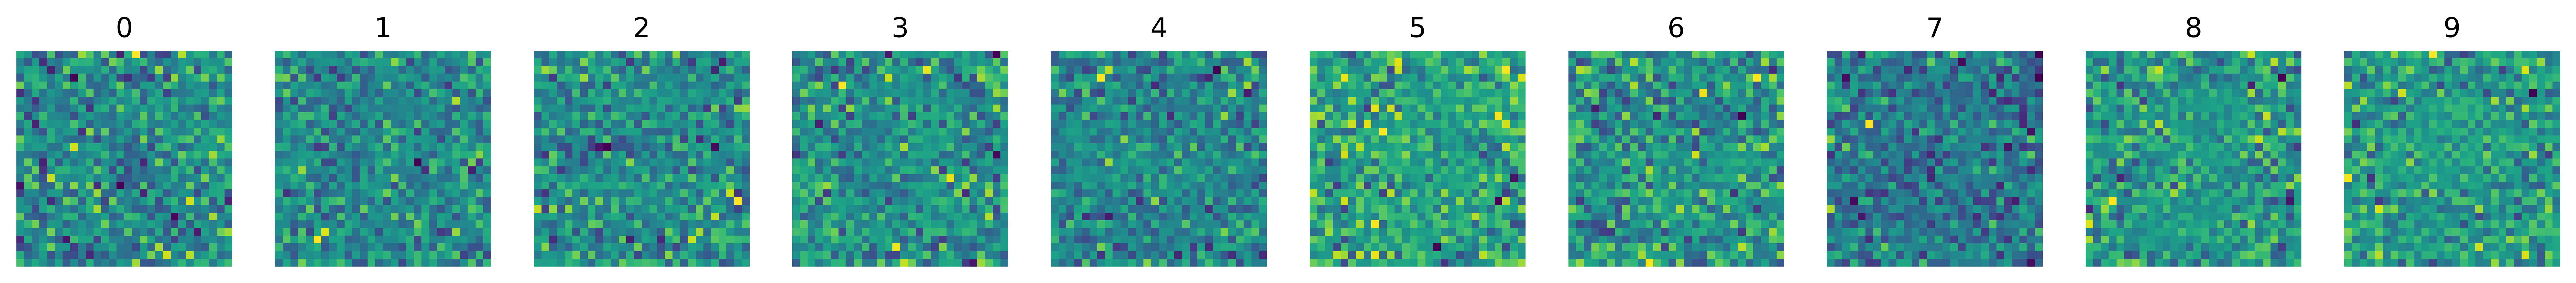

In [6]:
# train model
model, history = train(num_epochs=40)

# visualize weights
vis_weights([model.w])

# Visualize the weights throughout training history

### Train the model first!

The function `vis_weights` generates an image of how the weights during training. Changing `num_samples` increases the amount of samples to draw from the history. 

The samples are evenly spaced.

In [7]:
plt.rcParams['figure.figsize'] = [20, 20]
vis_weights(history['w'], num_samples=10)

<Figure size 2000x2000 with 0 Axes>

# Plot Data

### Train the model first!

Here we plot the loss, accuracy and $||w_t||$ over time. The blue line is for the training set and the orange line is for the test set

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.01, 'iteration number')

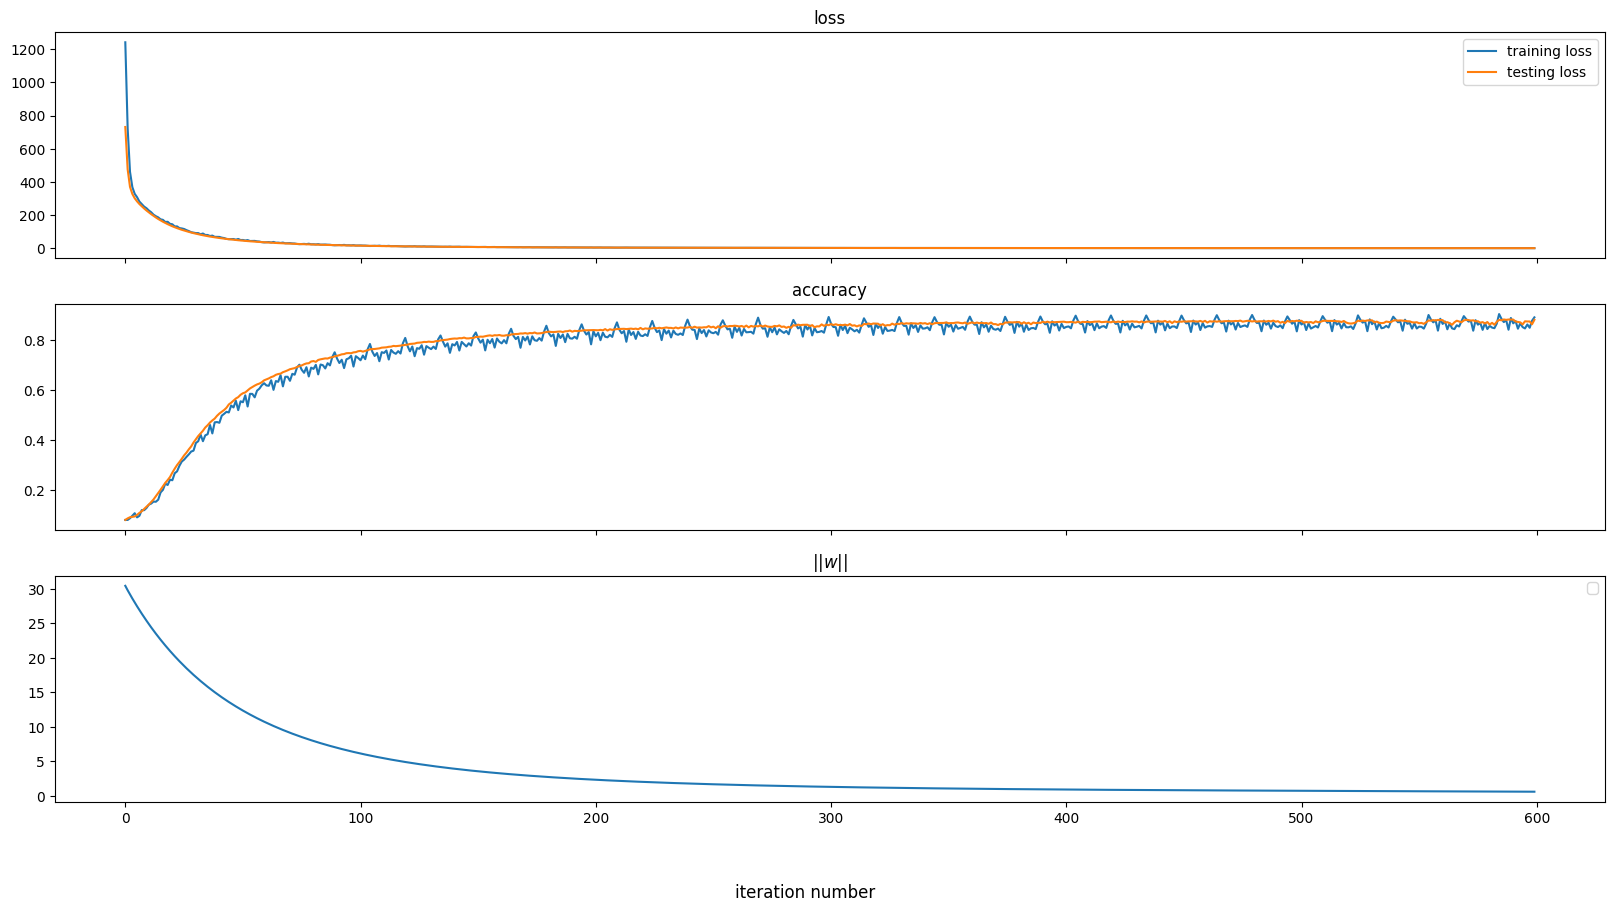

In [8]:
plt.rcParams['figure.figsize'] = [20, 10]

# get subplots
fig, ax = plt.subplots(3, 1, sharex=True)

x=len(history['train_loss'])
xi=range(x)

# plot loss
ax[0].plot(xi, history['train_loss'], label='training loss')
ax[0].plot(xi, history['test_loss'], label='testing loss')
ax[0].legend(loc='upper right')
ax[0].set_title('loss')

# plot accuracy
ax[1].plot(xi, history['train_acc'], label='training acc')
ax[1].plot(xi, history['test_acc'], label='testing acc')
ax[1].set_title('accuracy')

# plot l2 norm of weights\
norm_w=np.array([np.linalg.norm(w, ord=2) for w in history['w']])
ax[2].plot(xi, norm_w)
ax[2].set_title(r'$||w||$')

plt.legend()
fig.supxlabel('iteration number')

# Print the Confusion Matrix on the Test Set

We have a confusion matrix $C$ and its elements $C_{i,j}$ where $i$ is the row and $j$ is the column.  
Reads as "known as element $i$, and classified as $j$"

In [9]:
from sklearn.metrics import confusion_matrix

# make predictions on the test set
preds = model.predict(ds['test']['image'])

# display the confusion matrix
print(confusion_matrix(ds['test']['label'], preds))


[[ 946    0    1    2    2    8    6    1   12    2]
 [   0 1089    4    3    0    4    4    2   29    0]
 [  10   16  857   32    9    7   13   14   67    7]
 [   6    3   23  885    3   36    2    5   34   13]
 [   1    1    4    9  821    4   13    3   32   94]
 [  17    5    7   59   10  675   17    9   74   19]
 [  16    3    8    2   15   24  868    3   17    2]
 [   5   14   23   10   11    2    3  871   10   79]
 [   7   12   10   29   19   39   14    8  817   19]
 [   6    9    4   23   26    8    1   21   18  893]]


# Finally let's see what the model makes mistakes on

Execute the following code to randomly sample misclassified images from the testing set

6 mis-classified as 8


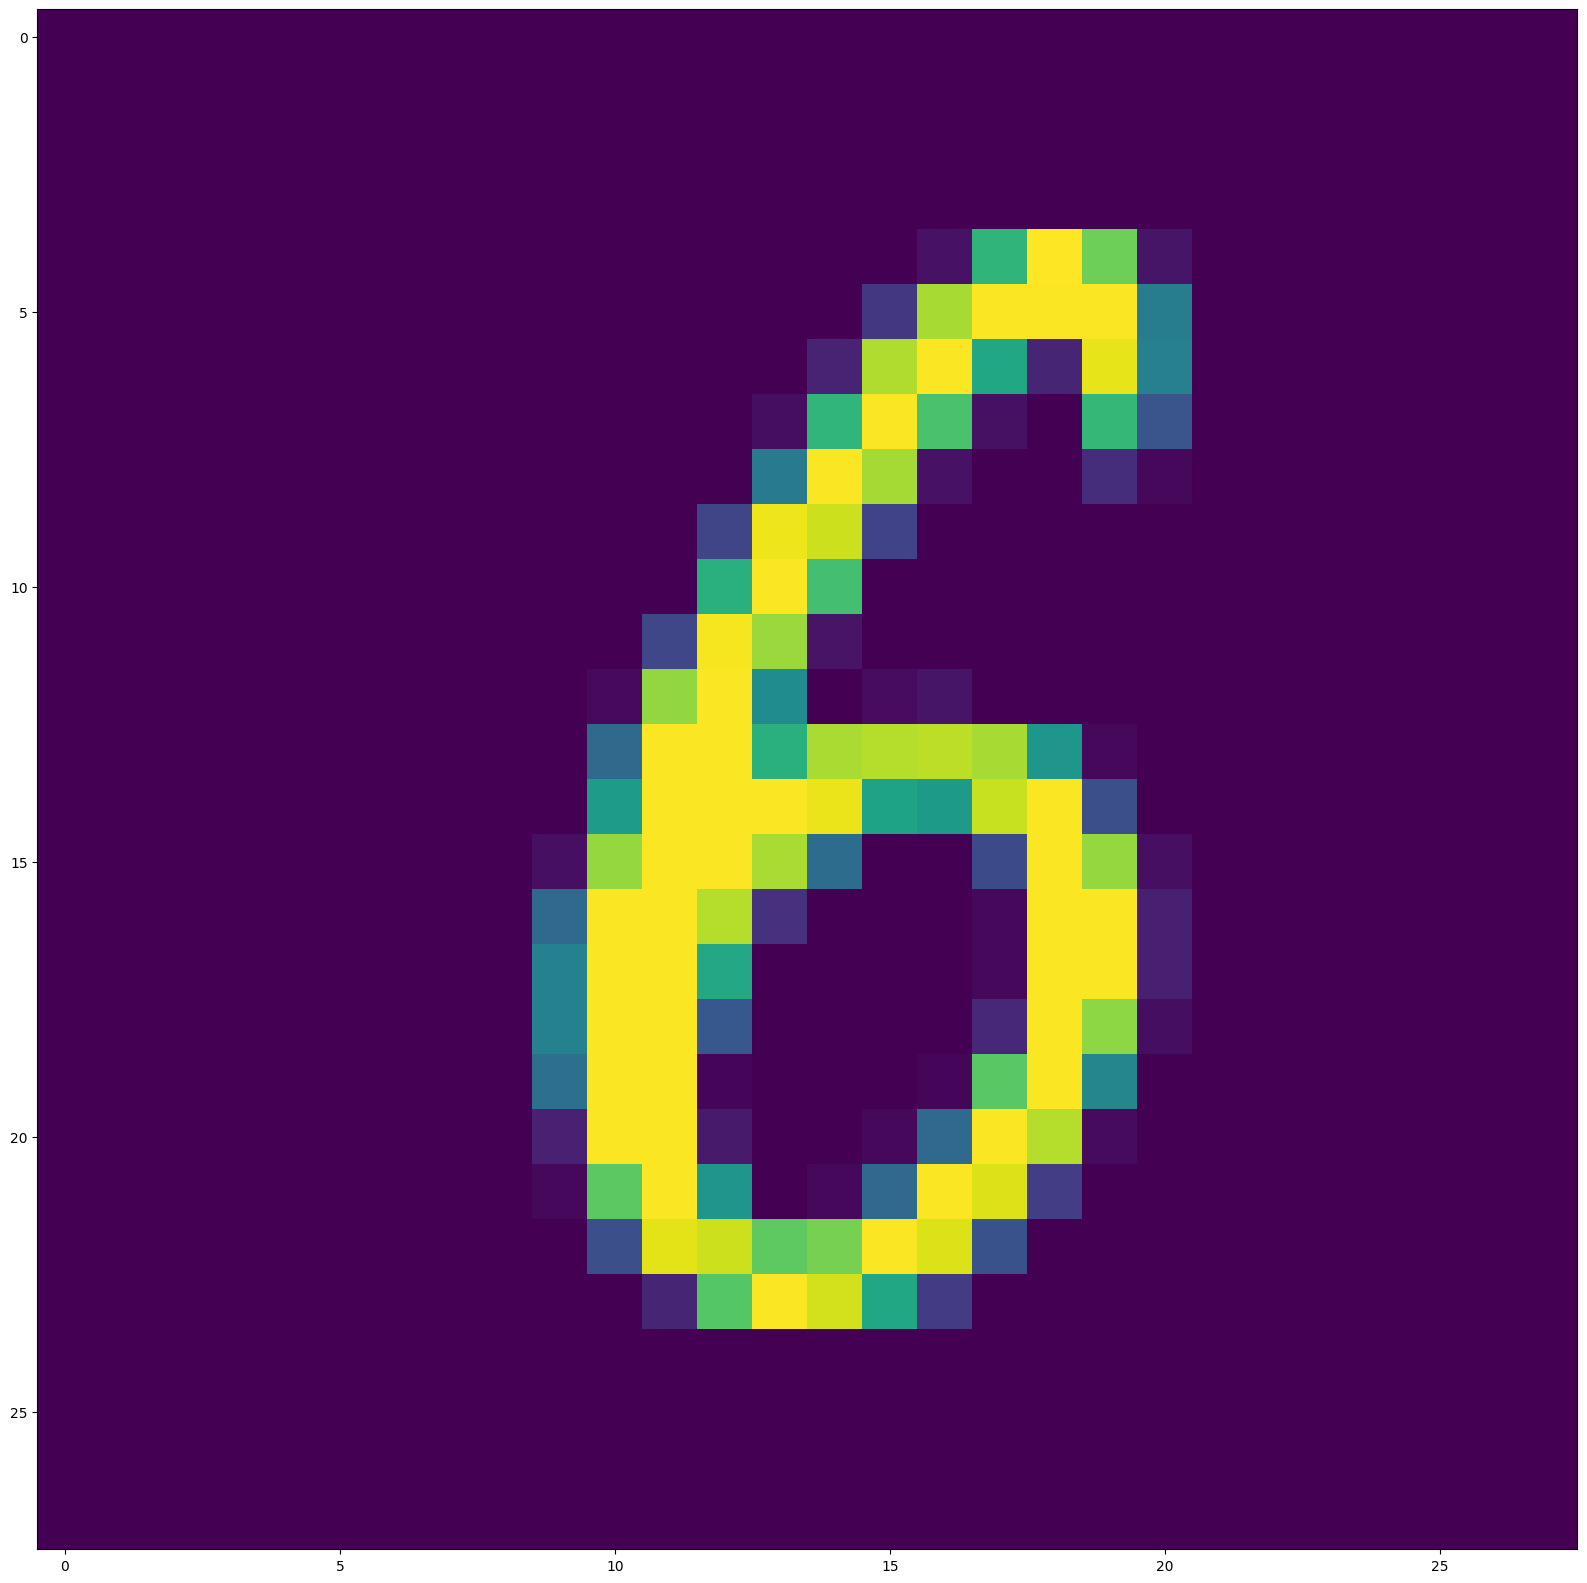

In [15]:
# run above first
plt.rcParams['figure.figsize'] = [20, 20]

# sample from the indeces of misclassified images and display the
# image and classification info
misclass_idx = np.where(preds != ds['test']['label'])[0]
sample_idx = np.random.choice(misclass_idx)
print(f'{ds["test"]["label"][sample_idx]} mis-classified as {preds[sample_idx]}')
plt.imshow(ds['test']['image'][sample_idx])